# 테스트

In [3]:
print("테스트")

테스트


# 패키지 로딩

In [4]:
import pandas as pd
import os
import seaborn as sns
import numpy as np

# 데이터 로딩

In [5]:
train = pd.read_csv("data/titanic/train.csv", index_col = "PassengerId")
test = pd.read_csv("data/titanic/test.csv", index_col = "PassengerId")


# 체크용도

assert train.shape == (891,11)  # 등호 2개임
assert test.shape == (418, 10)

train.head()
test.head()

train.describe() # 숫자형 데이터만 보여줌, count가 전체보다 작으면 NaN이 있는 것
test.describe() 

'''
train["test"] = np.arange(891) # 괄호 안의 숫자가 행의 개수와 같아야 함.
print(train.shape, test.shape)  # shape 옆에 괄호 없음

train.head()

del train["test"] # 열 삭제
# print(train.shape, test.shape)  # shape 옆에 괄호 없음

#train[0:3] # 상단 3개 행 보여주기
#train.loc[:,"Survived":"Cabin"] # 왼쪽 행, 오른쪽 열로서 인덱싱(지정)할 수 있음
#train.loc[:, ["Survived", "Pcalss", "Cabin"]] # Pclass가 제대로 나오지 않음
#train[["Cabin"]]


train.loc[(train["Fare"] > 100 ) & (train["Fare"] < 500), :] # Fare가 100보다 크고, 500보다 작은 데이터 보기

#df = pd.DataFrame(np.random.rand(5,7))
#df
'''

train.columns # 어떤 변수가 있는지 확인하는 것


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 열, 행 삭제 함수

df.dropna(how = "all") ==> 이렇게 하면 모두 NaN값이 들어있는 행을 제거
df.dropna(how = "any") ==> 이렇게 하면 하나라도 NaN값이 들어있는 행을 제거
df.fillna(values = 5.0) ==> NaN이라는 부분에 5.0을 무조건 입력한다.

df.drop(pd.to_datetime("20160701")) ==> 인덱스가 2016년 7월 1일까지의 행을 삭제하라.
df.drop(pd.to_datetime("20160701"), pd.to_datetime("20160704")) 
==> 2가지 조건을 가진 인덱스의 행을 삭제한다.
df.drop("F", axis = 1) => 기본적으로 행을 삭제하지만, axis = 1이 들어가면 열을 삭제할 수 있음. 
axis = 0 이면 기본값. 즉, 행을 삭제

arr.sum() = arr 성분전체 합, axis = 0 각각 열들의 합, axis = 1 각각 행들의 합

sort(arr, axis = 0 ) 각 열을 오름차순으로 정렬
sort(arr, axis = 1 ) 각 열을 오름차순으로 정렬

df.drop(["B", "F"], axis = 1) ==> 2개 이상의 열을 삭제할 때.

In [6]:
train.describe() # 숫자형 자료들의 NaN포함여부 체크
## Age 처리 필요 => Age에 0넣기
train[["Sex", "Cabin", "Ticket", "Embarked", "Name"]].describe() # 문자형 자료들 NaN 체크
## Cabin, Embarked  처리 => Embarket는 S로 넣기, Cabin은 0으로 처리?

#passid = train.index
#random_passid = np.random.permutation(891)
#train = train.reindex(index = random_passid)
#train.sort_index(axis=0)
#train.sort_values(by = "Age")

#train.head(20)


,Sex,Cabin,Ticket,Embarked,Name
count,891,204,891,889,891
unique,2,147,681,3,891
top,male,G6,347082,S,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc..."
freq,577,4,7,644,1


# 데이터 전처리

In [7]:

#### Ticket 길이
train["Ticket_len"] = train["Ticket"].str.len()
#train.loc[train["Ticket"].isnull()] = train["Ticket_len"].mean()
train[["Ticket", "Ticket_len"]]

#### 성별 인코딩
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

#### Embarked

train.loc[train["Embarked"] == "C", "Embarked_encode"] = 1 # 프랑스
train.loc[train["Embarked"] != "C", "Embarked_encode"] = 0 # 영국

test.loc[test["Embarked"] == "C", "Embarked_encode"] = 1 # 프랑스
test.loc[test["Embarked"] != "C", "Embarked_encode"] = 0 # 영국

# Embarked 빈값 처리 - test에는 없고, train에는 2개 있음
# train[train["Embarked"] != "C"].shape 
# 영국이 723개이고, 프랑스가 1개이므로 영국(0)으로 코딩

train.loc[train["Embarked"].isnull(), "Embarked_encode"] = 0

#### SibSp, ParCh

train.loc[(train["SibSp"] == 0) & (train["Parch"] == 0), "FamilySize"] = 0
train.loc[(train["SibSp"] != 0) | (train["Parch"] != 0), "FamilySize"] = train["SibSp"] + train["Parch"]

test.loc[(test["SibSp"] == 0) & (test["Parch"] == 0), "FamilySize"] = 0
test.loc[(test["SibSp"] != 0) | (test["Parch"] != 0), "FamilySize"] = test["SibSp"] + test["Parch"]

### Parch

# 빈값없음 (train, test)

train["Parch_encode"] = train["Parch"]
train.loc[train["Parch"] != 0, "Parch_encode"] = 0

test["Parch_encode"] = test["Parch"]
test.loc[test["Parch"] != 0, "Parch_encode"] = 0

#### Age

train["Age_encode"] = train["Age"]
train.loc[train["Age"].isnull()] = train["Age"].mean()

test["Age_encode"] = test["Age"]
test.loc[test["Age"].isnull()] = test["Age"].mean()


#### Fare

# 문자열은 빈값이 있는지 체크한 후에 인코딩
# train.loc[train["Fare"].isnull()] # 없음

train["Fare_fillin"] = train["Fare"]
train.loc[train["Fare"].isnull(), "Fare_fillin"] = train["Fare"].mean()

test["Fare_fillin"] = test["Fare"]
test.loc[test["Fare"].isnull(), "Fare_fillin"] = test["Fare"].mean()

# test.loc[test["Embarked"].isnull()] # 없음

# train.head(20)
# test.head(20)
# test.loc[test[["Fare"].isnull(), ["Cabin"].isnull()]]
# test.loc[(test["Cabin"].isnull() | test["Fare"].isnull())]


#test.loc[test["Ticket"].isnull()]
#train.loc[train["Ticket"].isnull()]

train.head()


#### Ticket

train["Ticket_len"] = train["Ticket"].str.len()
train.loc[train["Ticket_len"].isnull()] = train["Ticket_len"].mean()
train[["Ticket", "Ticket_len"]]

test["Ticket_len"] = test["Ticket"].str.len()
test.loc[test["Ticket_len"].isnull()] = test["Ticket_len"].mean()
test[["Ticket", "Ticket_len"]]

print(test.shape)
test["Ticket"].describe()
test["Ticket_len"].unique()

print(train.shape)
train["Ticket"].describe()
train["Ticket_len"].unique()

test.loc[test["Ticket"].isnull()]

#print(train["Ticket_len"].mean())

(418, 17)
(891, 18)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_encode,FamilySize,Parch_encode,Age_encode,Fare_fillin,Ticket_len
PassengerId,,,,,,,,,,,,,,,,,


# 데이터 전처리(원핫 인코딩)

,Survived
Pclass,
1.000000,0.655914
2.000000,0.479769
3.000000,0.239437
6.841737,6.841737


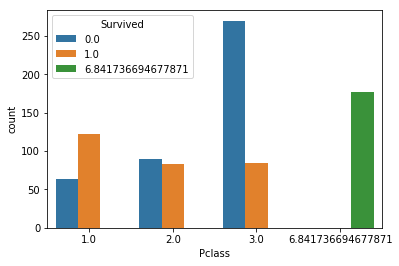

In [8]:
from pandas import DataFrame, Series

Pclass_onehot = pd.get_dummies(train["Pclass"], prefix="Pclass")
Pclass_onehot

# Pclass로 시작하는 변수로 만들어서 자동처리

Embarked_onehot = pd.get_dummies(train["Embarked"], prefix="Embarked")
Embarked_onehot

# Embarked로 시작하는 변수로 만들어서 자동처리

train_with_onehot = pd.concat(
    [DataFrame(train),Pclass_onehot, Embarked_onehot], axis = 1)
train_with_onehot.head()


train["Pclass"].describe()

sns.countplot (data = train, x = "Pclass", hue = "Survived")
pd.pivot_table (train, index = "Pclass", values = "Survived")

# 사용자 정의 함수

In [9]:
func = lambda x: x.max() - x.min()
train["func"] = train[["Pclass", "Age"]].apply(func, axis = 1)
train[["Age", "Pclass", "func"]]

# 사용자 정의 항수 만드는 기능

train["Pclass"].unique() # 중복값 제외하고 확인하는 범주형인지 아닌지 확인하는 기능
train["Sex"].unique()
train["Age"].unique()



array([22.        , 38.        , 26.        , 35.        ,  6.84173669,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

# Scikit-Learn의 모델 종류

## Tree계열
- DecisionTreeClassifier
- RandomForestClassifier
- Gradient Boosting Decision Tree

## Regression
- LogisticRegression

## SVM (Support Vector Machine)
- SVC

## KNN
- KNeighborsClassifier

## Bayesian
- MultinomialNB

## Neural Network
- MLPClassifier

# 예측모델 - Decision Tree (0.86)

In [10]:
from sklearn.tree import DecisionTreeClassifier


# features = ["Pclass"] # 0.739
# features = ["Sex_encode"] # 0.823
# features = ["Embarked_encode"] # 0.507
# features = ["Pclass", "Sex_encode"] #0.831
# features = ["Pclass", "Sex_encode", "Fare_fillin"] #0.848 
# features = ["Pclass", "Sex_encode", "Fare_fillin", "Age_encode"] # 0.864
# features = ["Pclass", "Sex_encode", "Fare_fillin", "Age_encode", "Ticket_len"] # 0.864
# features = ["Pclass", "Sex_encode", "Fare_fillin", "Age_encode", "Embarked_encode"] # 0.864
# features = ["Pclass", "Sex_encode", "Fare_fillin", "FamilySize", "Age_encode"] #0.864 
# features = ["Pclass", "Sex_encode", "Fare_fillin", "FamilySize", "Age_encode", "Parch_encode"]  # 0.864

### Age_encode, Parch_encode, Embarked_encode, "Ticket_len" 의미 없음


features = ["Pclass", "Sex_encode", "Fare_fillin", "Age_encode"]


x_train = train[features]
x_test = test[features]

# label 에러 방지를 위한 인코딩
encoded = train["Survived"]
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(encoded)

model = DecisionTreeClassifier(max_depth = 5)
z_train = model.fit (x_train, y_train)
predictions = model.predict(x_test)

########################################################################

#print("Num Features: %d" % z_train.n_features_,) 
#print("Selected Features: %s" % z_train.support_,)
#print("Feature Ranking: %s" % z_train.ranking_,)

#########################################################################

print("Train Set accuracy = ", model.score(x_train, y_train))

# print("Test Set accuracy = ", model.score(x_test, predictions))

Train Set accuracy =  0.8641975308641975


# 예측모델 - LogisticRegression (0.84)

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

features = ["Pclass", "Sex_encode", "Fare_fillin", "FamilySize", "Age_encode"]

x_train = train[features]
x_test = test[features]

# label 에러 방지를 위한 인코딩
encoded = train["Survived"]
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(encoded)

model = LogisticRegression()
rfe = RFE(model, 8)
z_train = rfe.fit (x_train, y_train)
predictions = rfe.predict(x_test)

########################################################################

#print("Num Features: %d" % z_train.n_features_,) 
#print("Selected Features: %s" % z_train.support_,)
#print("Feature Ranking: %s" % z_train.ranking_,)

#########################################################################

print("Train Set accuracy = ", rfe.score(x_train, y_train))
print("Test Set accuracy = ", rfe.score(x_test, predictions))

Train Set accuracy =  0.8428731762065096
Test Set accuracy =  1.0


# 변수선택

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

features = ["Pclass", "Sex_encode", "Fare_fillin", "FamilySize", "Age_encode"]
x_train = train[features]
encoded = train["Survived"]

# label 에러 방지를 위한 인코딩
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(encoded)

model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit (x_train, y_train)

print("Num Features: %d" % fit.n_features_,) 
print("Selected Features: %s" % fit.support_,)
print("Feature Ranking: %s" % fit.ranking_,)



'''
# 에러 메시지1: TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

print() 바깥에 있는 것을 안쪽으로 들여오고, 마지막에 콤마 추가
튜플이라는 것을 선언하려면 마지막 콤마 필요
'''

'''
# 에러 메시지2 : ValueError: Unknown label type: 'continuous'

결과값을 인코딩해줌으로써 해결


'''

Num Features: 5
Selected Features: [ True  True  True  True  True]
Feature Ranking: [1 1 1 1 1]


"\n# 에러 메시지2 : ValueError: Unknown label type: 'continuous'\n\n결과값을 인코딩해줌으로써 해결\n\n\n"